<a href="https://colab.research.google.com/github/harish-03-11/Bank-churn-customers-with-sampling/blob/main/Har_Bank_Customer_Churn_with_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given: Bank customers dataset


Building a classifier which can determine whether they will leave in the next 6 months or not

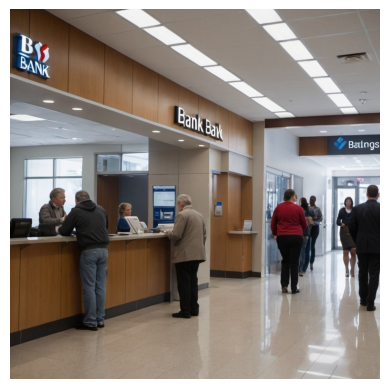

In [ ]:
# Step 1: Load and display the image using OpenCV and Matplotlib
import cv2
from matplotlib import pyplot as plt

# Path to your image file
image_path = '/content/sample_data/Images_gemini/openart-image_eT413LtU_1724666348957_raw.jpg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert the image from BGR (OpenCV default) to RGB (Matplotlib default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes for better visualization
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/sample_data/archive.zip")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#checking what are the unique values
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.replace({'Female': 1, "Male": 0},inplace=True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.drop(["CustomerId","RowNumber",'Surname','Geography'], axis = 1,inplace=True)

In [ ]:
df1 = df

Text(0.5, 1.0, 'Customer Exited Prediction Visualiztion')

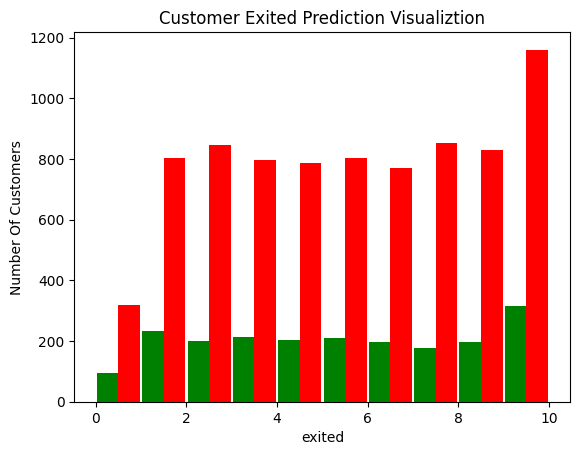

In [ ]:
exited_no = df1[df1.Exited==0].Tenure
exited_yes = df1[df1.Exited==1].Tenure

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['green','red'],label=['Exited=0','Exited=1'])
plt.xlabel("exited")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

In [ ]:
df1.dtypes

,0
CreditScore,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Exited,int64


In [ ]:
df1.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
cols_to_scale = ['CreditScore', 'Balance', 'EstimatedSalary','NumOfProducts','Age','Tenure']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [ ]:
df1.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
5,0.590,0,0.351351,0.8,0.453394,0.333333,1,0,0.748797,1
6,0.944,0,0.432432,0.7,0.000000,0.333333,1,1,0.050261,0
7,0.052,1,0.148649,0.4,0.458540,1.000000,1,0,0.596733,1
8,0.302,0,0.351351,0.4,0.566170,0.333333,0,1,0.374680,0
9,0.668,0,0.121622,0.2,0.536488,0.000000,1,1,0.358605,0


In [ ]:
df1.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [ ]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [ ]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [ ]:
df1.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
df1.shape

(10000, 10)

In [ ]:
df1.head(1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.0,0.0,1,1,0.506735,1


In [ ]:
X = df1[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y = df1['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
model = keras.Sequential([

              keras.layers.Dense(8, input_shape = (9,),activation="relu"),
              keras.layers.Dense(1,activation="sigmoid")

])

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train1,y_train1,epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4871 - loss: 0.7428
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8075 - loss: 0.5136
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7943 - loss: 0.5017
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7957 - loss: 0.4836
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8023 - loss: 0.4684
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7988 - loss: 0.4697
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7988 - loss: 0.4633
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8115 - loss: 0.4400
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8108 - loss: 0.4459
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8116 - loss: 0.4394
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8166 - loss: 0.4332
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(X_test1,y_test1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8426 - loss: 0.3664


[0.36374038457870483, 0.8479999899864197]

In [ ]:

yp = model.predict(X_test1)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.03225707],
       [0.0866795 ],
       [0.16689011],
       [0.09584709],
       [0.10441325]], dtype=float32)

In [ ]:

y_test1[:5]


,Exited
7054,0
442,0
3954,0
2288,0
3196,0


In [ ]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:

y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [945]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification for Unbalanced data set")
print("")
print(classification_report(y_test1,y_pred))

Classification for Unbalanced data set

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1595
           1       0.73      0.39      0.51       405

    accuracy                           0.85      2000
   macro avg       0.80      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000



Text(95.72222222222221, 0.5, 'Truth')

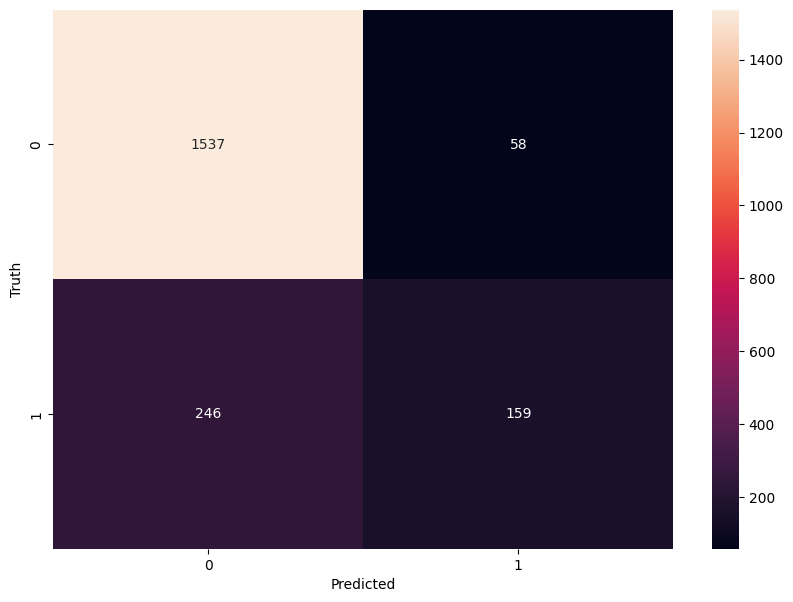

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test1,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
#Accuracy

In [ ]:
round((1554+121)/(1554+121+41+282),2)

0.84

How to handle imbalanced data sets

In [ ]:
len(X_train1.value_counts())

8000

In [ ]:
y_train1.value_counts()

,count
Exited,
0,6368
1,1632


UNDERSAMPLED METHOD

In [ ]:
y_test1.value_counts()

,count
Exited,
0,1595
1,405


In [ ]:
from sklearn.utils import resample


In [ ]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1


In [ ]:
df_majority = df[df1['Exited']==0]
df_minority = df[df1['Exited']==1]

df_downsampled = resample(df_majority ,replace=False,n_samples = len(df_minority),random_state =42)

In [ ]:
df_downsampled

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,0.512,0,0.256757,0.8,0.616635,0.333333,1,0,0.445481,0
6409,0.666,1,0.202703,0.9,0.000000,0.333333,1,1,0.193883,0
2157,0.788,1,0.351351,0.3,0.000000,0.333333,1,1,0.945113,0
1618,0.694,0,0.121622,0.8,0.562873,0.333333,1,0,0.452941,0
1633,0.424,0,0.229730,0.7,0.000000,0.000000,0,0,0.244314,0
...,...,...,...,...,...,...,...,...,...,...
9918,0.604,0,0.175676,0.1,0.529548,0.000000,0,0,0.790290,0
7710,0.312,1,0.297297,0.3,0.000000,0.000000,1,1,0.721739,0
5156,0.410,0,0.202703,0.5,0.507550,0.000000,0,1,0.608947,0
3104,0.352,0,0.175676,0.5,0.580065,0.000000,1,0,0.662029,0


In [ ]:
df_new = pd.concat([df_downsampled,df_minority],axis=0)

In [ ]:
df_new.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,0.512,0,0.256757,0.8,0.616635,0.333333,1,0,0.445481,0
6409,0.666,1,0.202703,0.9,0.000000,0.333333,1,1,0.193883,0
2157,0.788,1,0.351351,0.3,0.000000,0.333333,1,1,0.945113,0
1618,0.694,0,0.121622,0.8,0.562873,0.333333,1,0,0.452941,0
1633,0.424,0,0.229730,0.7,0.000000,0.000000,0,0,0.244314,0


In [ ]:
features = df_downsampled[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
target = df_downsampled['Exited']

In [ ]:
features.value_counts()

CreditScore  Gender  Age       Tenure  Balance   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary
0.122        0       0.148649  0.0     0.237934  0.333333       1          1               0.267384           1
0.690        0       0.418919  0.9     0.635551  0.000000       1          0               0.679214           1
0.692        1       0.121622  0.2     0.383141  0.333333       1          1               0.029863           1
                     0.094595  0.8     0.503960  0.000000       1          0               0.609523           1
             0       0.567568  0.8     0.353876  0.000000       1          1               0.984328           1
                                                                                                             ..
0.522        1       0.148649  0.4     0.314414  0.333333       1          1               0.134593           1
                     0.108108  0.2     0.428496  0.333333       1          1               0.604008           1
             0       0.675676  0.5     0.329007  0.333333       1          1               0.732252           1
                     0.270270  0.4     0.283058  0.333333       1          0               0.012165           1
1.000        1       0.337838  0.8     0.367659  0.333333       1          0               0.274717           1
Name: count, Length: 2037, dtype: int64

In [ ]:
target.value_counts()

,count
Exited,
0,2037


In [ ]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(features,target,test_size=0.20,random_state=42, stratify=target)

In [ ]:
X_train2.shape

(1629, 9)

In [ ]:
y_train2.shape

(1629,)

In [ ]:
y_test2.value_counts()



,count
Exited,
0,408


In [ ]:
df_new.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,0.512,0,0.256757,0.8,0.616635,0.333333,1,0,0.445481,0
6409,0.666,1,0.202703,0.9,0.000000,0.333333,1,1,0.193883,0
2157,0.788,1,0.351351,0.3,0.000000,0.333333,1,1,0.945113,0


In [ ]:
model_new = keras.Sequential([
    keras.layers.Dense(8, input_dim=9, activation = 'relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation = 'sigmoid')


])

model_new.compile(

    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_new.fit(X_train2,y_train2,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5914 - loss: 0.6552
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3343
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1152
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0418
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0172
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0094
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0051
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0032
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0020
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0015
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.9989e-04
Epoch 12/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 

In [ ]:
model.evaluate(X_test2,y_test2)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9684 - loss: 0.1612 


[0.16400925815105438, 0.9730392098426819]

In [ ]:
print("Shape of X_train2:", X_train2.shape)
print("Shape of y_train2:", y_train2.shape)


Shape of X_train2: (1629, 9)
Shape of y_train2: (1629,)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
yp_new = model_new.predict(X_test2)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
y_new_pred = [] # make sure this list is initialized
for element in yp_new:
  if element > 0.5:
    y_new_pred.append(1) # append to the correct list
  else:
    y_new_pred.append(0)

In [ ]:
confusion_matrix(y_test2,y_new_pred)

array([[408]])

In [ ]:
print("Under sampled method : Classification report")
print('')
print(classification_report(y_test2,y_new_pred))

Under sampled method : Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



Text(95.72222222222221, 0.5, 'Truth')

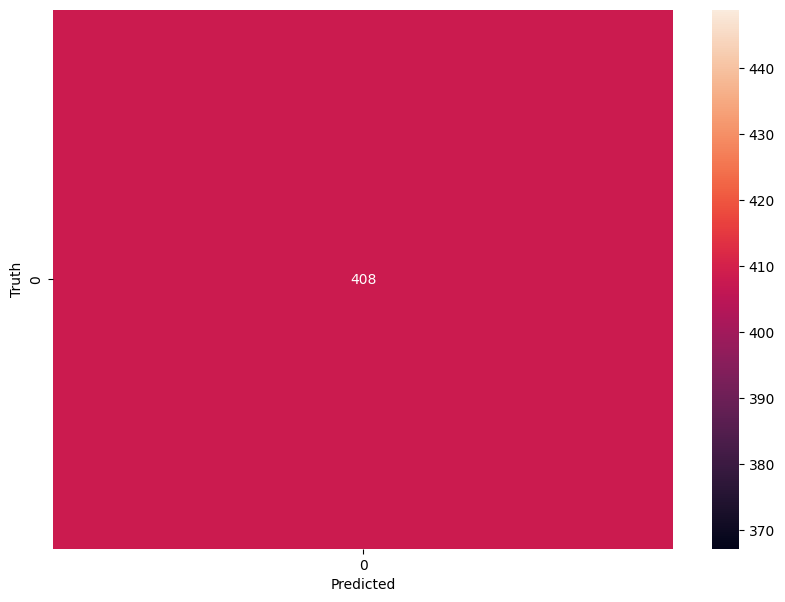

In [ ]:
import seaborn as sn
cmm = tf.math.confusion_matrix(labels=y_test2,predictions=y_new_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cmm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Over sampling method

In [ ]:
df_new.head(2

            )

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,0.512,0,0.256757,0.8,0.616635,0.333333,1,0,0.445481,0
6409,0.666,1,0.202703,0.9,0.000000,0.333333,1,1,0.193883,0


In [ ]:
df_majority_oversampling = df[df1['Exited']==0]
df_minority_oversampling = df[df1['Exited']==1]

In [ ]:
df_majority_oversampling.shape

(7963, 10)

In [ ]:
df_minority_oversampling.shape

(2037, 10)

In [ ]:
df_minority_upsampled = resample(df_minority_oversampling,replace = True, n_samples = len(df_majority_oversampling),random_state=42)

In [ ]:
df_oversampled = pd.concat([df_majority_oversampling, df_minority_upsampled],axis=0)

In [ ]:
df_oversampled.shape

(15926, 10)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
oversample_x = df_oversampled[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
oversample_y = df_oversampled['Exited']

In [ ]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(oversample_x,oversample_y,test_size=0.2,stratify=oversample_y,random_state=42)

In [ ]:
model_oversample = keras.Sequential([
    keras.layers.Dense(8,input_dim=9, activation = 'relu'),
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(4, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model_oversample.compile (
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model_oversample.fit(X_train3,y_train3,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5707 - loss: 0.6768
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6560 - loss: 0.6383
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6765 - loss: 0.6141
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6853 - loss: 0.5960
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7100 - loss: 0.5750
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7246 - loss: 0.5539
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7404 - loss: 0.5337
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7458 - loss: 0.5154
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7506 - loss: 0.5091
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7483 - loss: 0.5061
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7551 - loss: 0.4958
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
yp_oversample = model_oversample.predict(X_test3)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred_oversample = []
for element in yp_oversample:
  if element > 0.5:
    y_pred_oversample.append(1)
  else:
    y_pred_oversample.append(0)

In [ ]:
print("Classification report for over sampling ")
print("")
print(classification_report(y_test3,y_pred_oversample))

Classification report for over sampling 

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1593
           1       0.78      0.74      0.76      1593

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186



In [ ]:
print(confusion_matrix(y_test3,y_pred_oversample))

[[1260  333]
 [ 414 1179]]


Text(95.72222222222221, 0.5, 'Truth')

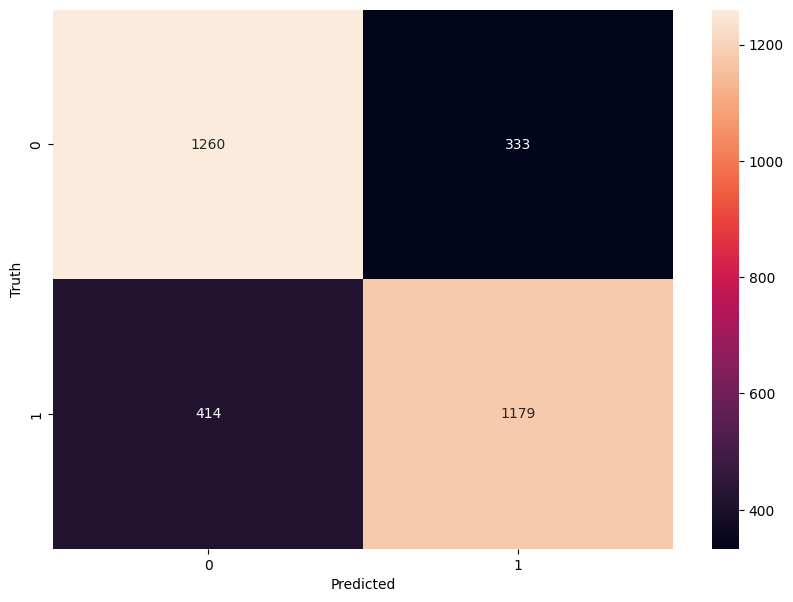

In [ ]:
import seaborn as sn
cm_oversample = tf.math.confusion_matrix(labels=y_test3,predictions=y_pred_oversample)

plt.figure(figsize = (10,7))
sn.heatmap(cm_oversample, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Trying with Smote

In [929]:
sm_features = df1[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
sm_target = df1['Exited']

In [930]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')

In [931]:
df_majority_sm = df[df1['Exited']==0]
df_minority_sm = df[df1['Exited']==1]

In [932]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')

In [933]:
x_sm, y_sm = smote.fit_resample(sm_features,sm_target)

In [934]:
y_sm.value_counts()

,count
Exited,
1,7963
0,7963


In [935]:
sm_target.value_counts(

)

,count
Exited,
0,7963
1,2037


In [936]:
from sklearn.model_selection import train_test_split
X_train4,X_test4,y_train4,y_test4 = train_test_split(x_sm,y_sm,test_size =0.20,random_state=42,stratify = y_sm)

In [937]:
model_smote = keras.Sequential([
    keras.layers.Dense(8, input_dim=9, activation = 'relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation = 'sigmoid')


])

model_smote.compile(

    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_smote.fit(X_train4,y_train4,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5327 - loss: 0.7033
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6277 - loss: 0.6726
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6645 - loss: 0.6292
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7009 - loss: 0.5798
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7283 - loss: 0.5452
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7488 - loss: 0.5230
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7473 - loss: 0.5143
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7581 - loss: 0.4975
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7613 - loss: 0.4857
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7592 - loss: 0.4954
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7590 - loss: 0.4873
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
model_smote.evaluate(X_test4,y_test4
                     )

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7715 - loss: 0.4565


[0.4526556134223938, 0.7749529480934143]

In [940]:
yp_smote = model_smote.predict(X_test4)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [941]:
y_pred_smote = []
for element in yp_smote:
  if element > 0.5:
    y_pred_smote.append(1)
  else:
    y_pred_smote.append(0)

In [942]:
print("Classificaiton report for SMOTE OVER SAMPLE METHOD")
print("")
print(classification_report(y_test4,y_pred_smote))

Classificaiton report for SMOTE OVER SAMPLE METHOD

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1593
           1       0.79      0.71      0.75      1593

    accuracy                           0.76      3186
   macro avg       0.77      0.76      0.76      3186
weighted avg       0.77      0.76      0.76      3186



Text(95.72222222222221, 0.5, 'Truth')

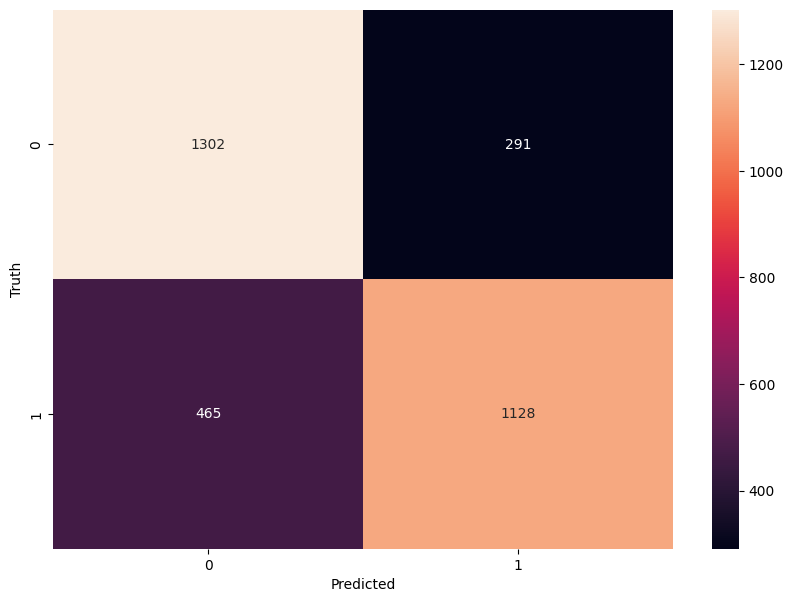

In [943]:
import seaborn as sn
cm_smote = tf.math.confusion_matrix(labels=y_test4,predictions=y_pred_smote)

plt.figure(figsize = (10,7))
sn.heatmap(cm_smote, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Ensemble methods

ENSEMBLE PART 1

In [ ]:
target_0_major = df[df1['Exited']==0]
target_1_minor = df[df1['Exited']==1]

In [ ]:
df_combine_ensemble = pd.concat([target_0_major[:2037],target_1_minor],axis=0)
ensemble_x = df_combine_ensemble[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
ensemble_y = df_combine_ensemble['Exited']


In [ ]:
ensemble_y.value_counts()

,count
Exited,
0,2037
1,2037


In [ ]:
target_0_major.Exited.value_counts(
)

,count
Exited,
0,7963


In [ ]:
print(target_1_minor.Exited.value_counts)


<bound method IndexOpsMixin.value_counts of 0       1
2       1
5       1
7       1
16      1
       ..
9981    1
9982    1
9991    1
9997    1
9998    1
Name: Exited, Length: 2037, dtype: int64>


In [ ]:
df_combine_ensemble.value_counts

<bound method DataFrame.value_counts of       CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  \
1           0.516       1  0.310811     0.1  0.334031       0.000000   
3           0.698       1  0.283784     0.1  0.000000       0.333333   
4           1.000       1  0.337838     0.2  0.500246       0.000000   
6           0.944       0  0.432432     0.7  0.000000       0.333333   
8           0.302       0  0.351351     0.4  0.566170       0.333333   
...           ...     ...       ...     ...       ...            ...   
9981        0.296       0  0.324324     0.3  0.605982       0.000000   
9982        0.610       1  0.378378     0.7  0.546617       0.000000   
9991        0.494       1  0.472973     0.4  0.352259       0.000000   
9997        0.718       1  0.243243     0.7  0.000000       0.000000   
9998        0.844       0  0.324324     0.3  0.299226       0.333333   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1             0               1         0.562709       0  
3             0               0         0.469120       0  
4             1               1         0.395400       0  
6             1               1         0.050261       0  
8             0               1         0.374680       0  
...         ...             ...              ...     ...  
9981          1               1         0.267193       1  
9982          1               0         0.575729       1  
9991          1               0         0.346899       1  
9997          0               1         0.210390       1  
9998          1               0         0.464429       1  

[4074 rows x 10 columns]>

In [ ]:
X_train5,X_test5,y_train5,y_test5= train_test_split(ensemble_x,ensemble_y,test_size=0.20,random_state=42 ,stratify=ensemble_y)


In [ ]:
model_ensemble = keras.Sequential([
    keras.layers.Dense(8,input_dim=9, activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])
model_ensemble.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)

model_ensemble.fit(X_train5,y_train5,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5254 - loss: 0.6834
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6100 - loss: 0.6742
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6333 - loss: 0.6604
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6470 - loss: 0.6460
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6521 - loss: 0.6375
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6686 - loss: 0.6171
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6756 - loss: 0.6126
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - loss: 0.6008
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6809 - loss: 0.5891
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - loss: 0.5971
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7060 - loss: 0.5676
Epoch 12/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [ ]:
model_ensemble.evaluate(X_test5,y_test5)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7721 - loss: 0.4510  


[0.47357919812202454, 0.754601240158081]

In [ ]:
yp_ensemble1 = model_ensemble.predict(X_test5)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
y_pred_ensemble1 = []
for element in yp_ensemble1:
  if element > 0.5:
    y_pred_ensemble1.append(1)
  else:
    y_pred_ensemble1.append(0)

In [ ]:
print("Classification report for ensemble Batch 1")
print("")
print(classification_report(y_test5,y_pred_ensemble1))

Classification report for ensemble part 1

              precision    recall  f1-score   support

           0       0.77      0.72      0.75       408
           1       0.74      0.79      0.76       407

    accuracy                           0.75       815
   macro avg       0.76      0.75      0.75       815
weighted avg       0.76      0.75      0.75       815



In [ ]:
y_test5.value_counts()

,count
Exited,
0,408
1,407


Text(95.72222222222221, 0.5, 'Truth')

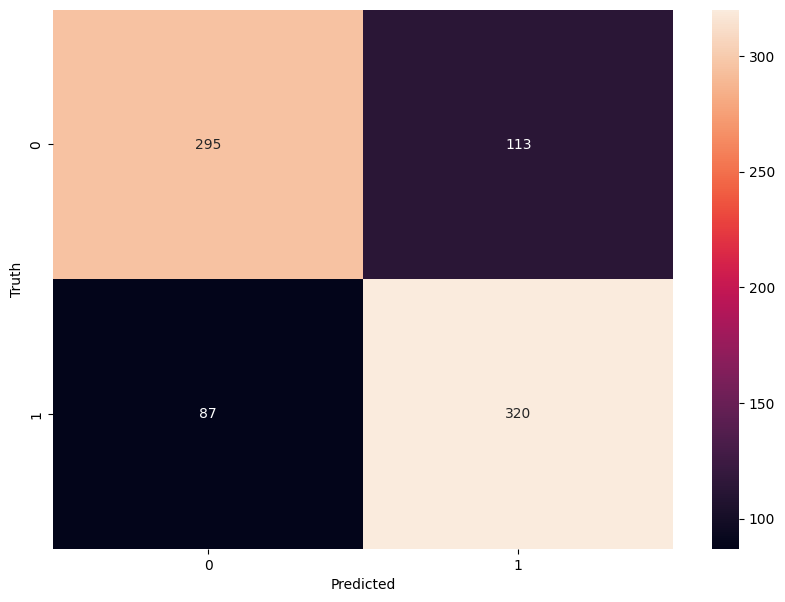

In [ ]:
import seaborn as sn
cm_ensemble1 = tf.math.confusion_matrix(labels=y_test5,predictions=y_pred_ensemble1)

plt.figure(figsize = (10,7))
sn.heatmap(cm_ensemble1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Ensemble 2

In [ ]:
target_0_major2 = df[df1['Exited']==0]
target_1_minor2 = df[df1['Exited']==1]

In [ ]:
2037+2037
4074+2037

6111

In [ ]:
df_combine_ensemble2 = pd.concat([target_0_major2[2037:4074],target_1_minor2],axis=0)
ensemble2_x = df_combine_ensemble2[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
ensemble2_y = df_combine_ensemble2['Exited']

In [ ]:
X_train6,X_test6,y_train6,y_test6= train_test_split(ensemble2_x,ensemble2_y,test_size=0.20,random_state=42 ,stratify=ensemble_y)


In [ ]:
2654+2654

5308

In [ ]:
model_ensemble2 = keras.Sequential([
    keras.layers.Dense(8,input_dim=9, activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])
model_ensemble2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)

model_ensemble2.fit(X_train6,y_train6,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4921 - loss: 0.6966
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5639 - loss: 0.6821
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5982 - loss: 0.6721
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6177 - loss: 0.6645
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6329 - loss: 0.6460
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6376 - loss: 0.6420
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6418 - loss: 0.6364
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6358 - loss: 0.6376
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6407 - loss: 0.6331
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6482 - loss: 0.6246
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - loss: 0.6045
Epoch 12/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [ ]:
model_ensemble2.evaluate(X_test6,y_test6)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7477 - loss: 0.4655


[0.46995240449905396, 0.7582821846008301]

In [ ]:
yp_ensemble2 = model_ensemble2.predict(X_test6)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
y_pred_ensemble2 = []
for element in yp_ensemble2:
  if element > 0.5:
    y_pred_ensemble2.append(1)
  else:
    y_pred_ensemble2.append(0)

In [946]:
print("Classification report Ensemble batch 2")
print("")
print(classification_report(y_test6,y_pred_ensemble2))

Classification report Ensemble batch 2

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       408
           1       0.76      0.75      0.76       407

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815



Text(95.72222222222221, 0.5, 'Truth')

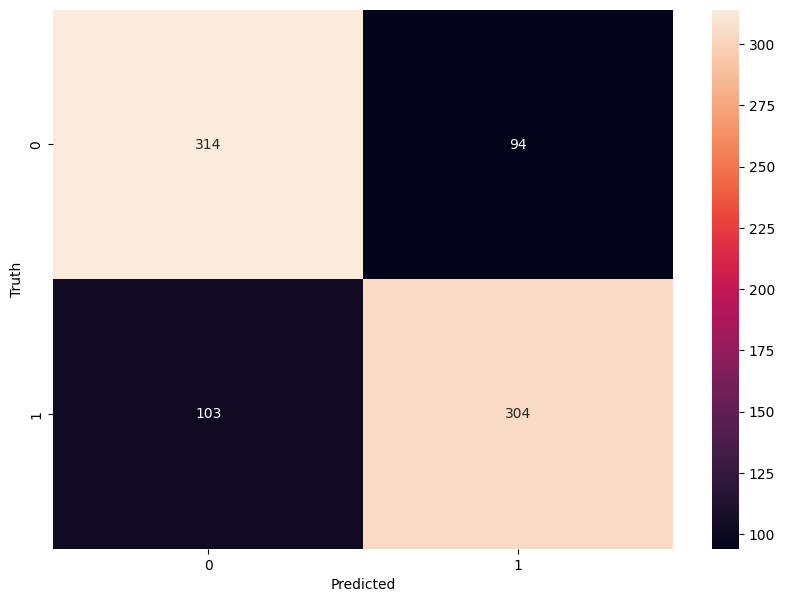

In [ ]:
import seaborn as sn
cm_ensemble2 = tf.math.confusion_matrix(labels=y_test6,predictions=y_pred_ensemble2)

plt.figure(figsize = (10,7))
sn.heatmap(cm_ensemble2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Ensemble batch 3

In [ ]:
target_0_major3 = df[df1['Exited']==0]
target_1_minor3 = df[df1['Exited']==1]

In [ ]:
7963-5308

2655

In [ ]:
df_combine_ensemble3 = pd.concat([target_0_major3[4074:6111],target_1_minor3],axis=0)
ensemble_x3= df_combine_ensemble3[['CreditScore','Gender','Age',"Tenure",'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
ensemble_y3 = df_combine_ensemble3['Exited']


In [ ]:
X_train7,X_test7,y_train7,y_test7= train_test_split(ensemble_x3,ensemble_y3,test_size=0.20,random_state=42 ,stratify=ensemble_y)


In [ ]:
df_combine_ensemble3.Exited.value_counts()

,count
Exited,
0,2037
1,2037


In [ ]:
model_ensemble3 = keras.Sequential([
    keras.layers.Dense(8,input_dim=9, activation='relu'),
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])
model_ensemble3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)

model_ensemble3.fit(X_train7,y_train7,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5104 - loss: 0.6946
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5177 - loss: 0.6914
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5849 - loss: 0.6849
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6011 - loss: 0.6766
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6163 - loss: 0.6697
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5988 - loss: 0.6635
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6396 - loss: 0.6493
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - loss: 0.6332
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6715 - loss: 0.6230
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6696 - loss: 0.6198
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7015 - loss: 0.5959
Epoch 12/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [ ]:
model.evaluate(X_test7,y_test7)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6824 - loss: 0.6009 


[0.5822868943214417, 0.7030674815177917]

In [ ]:
yp_ensemble3 = model_ensemble3.predict(X_test7)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
y_pred_ensemble3 = []
for element in yp_ensemble3:
  if element > 0.5:
    y_pred_ensemble3.append(1)
  else:
    y_pred_ensemble3.append(0)

In [947]:
print("classification report ensemble batch 3")
print("")
print(classification_report(y_test7,y_pred_ensemble3))

classification report ensemble batch 3

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       408
           1       0.74      0.78      0.76       407

    accuracy                           0.75       815
   macro avg       0.75      0.75      0.75       815
weighted avg       0.75      0.75      0.75       815



Text(95.72222222222221, 0.5, 'Truth')

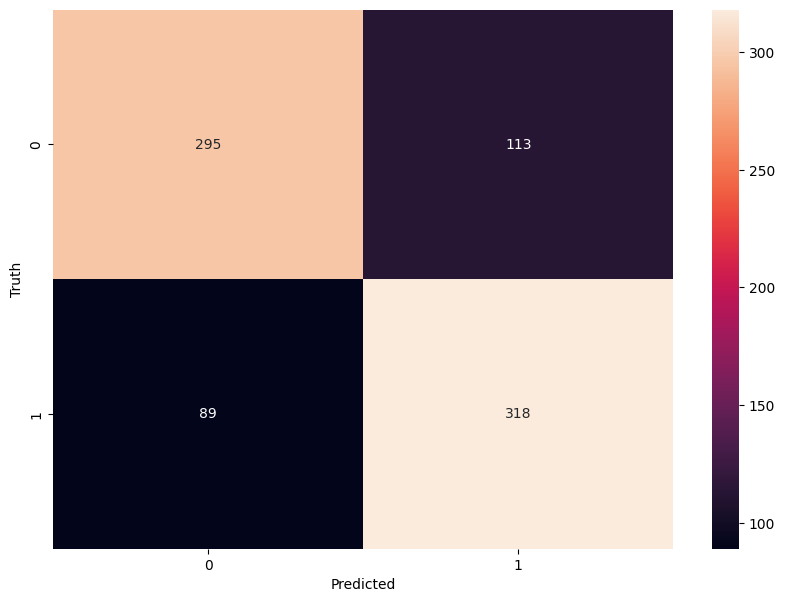

In [ ]:
import seaborn as sn
cm_ensemble3 = tf.math.confusion_matrix(labels=y_test7,predictions=y_pred_ensemble3)

plt.figure(figsize = (10,7))
sn.heatmap(cm_ensemble3, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
len(y_pred_ensemble1)

815

In [ ]:
y_pred_final = y_pred_ensemble1.copy()
for i in range(len(y_pred_ensemble1)):
    n_ones = y_pred_ensemble1[i] + y_pred_ensemble2[i] + y_pred_ensemble3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [948]:
print("Ensemble method final report ")
print("")
cl_rep = classification_report(y_test7, y_pred_final)
print(cl_rep)

Ensemble method final report 

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       408
           1       0.81      0.78      0.79       407

    accuracy                           0.80       815
   macro avg       0.80      0.80      0.80       815
weighted avg       0.80      0.80      0.80       815



In [ ]:
print("")